What's the error of the concentration field for all the learned R curves of all methods?

In [104]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
data_in_dir = Path("../data/")
data_out_dir = Path("../data_out/")

In [106]:
experiment_dirs = [p for p in data_out_dir.rglob("c_predictions.npy") if "quantile" not in str(p)]
print(len(experiment_dirs))
print(np.load(experiment_dirs[0]).shape)

68
(30, 2, 26, 1)


In [107]:
c_true = np.load(data_in_dir / "synthetic_data/retardation_freundlich/c_train.npy")[..., None]
print(c_true.shape)

(2001, 2, 26, 1)


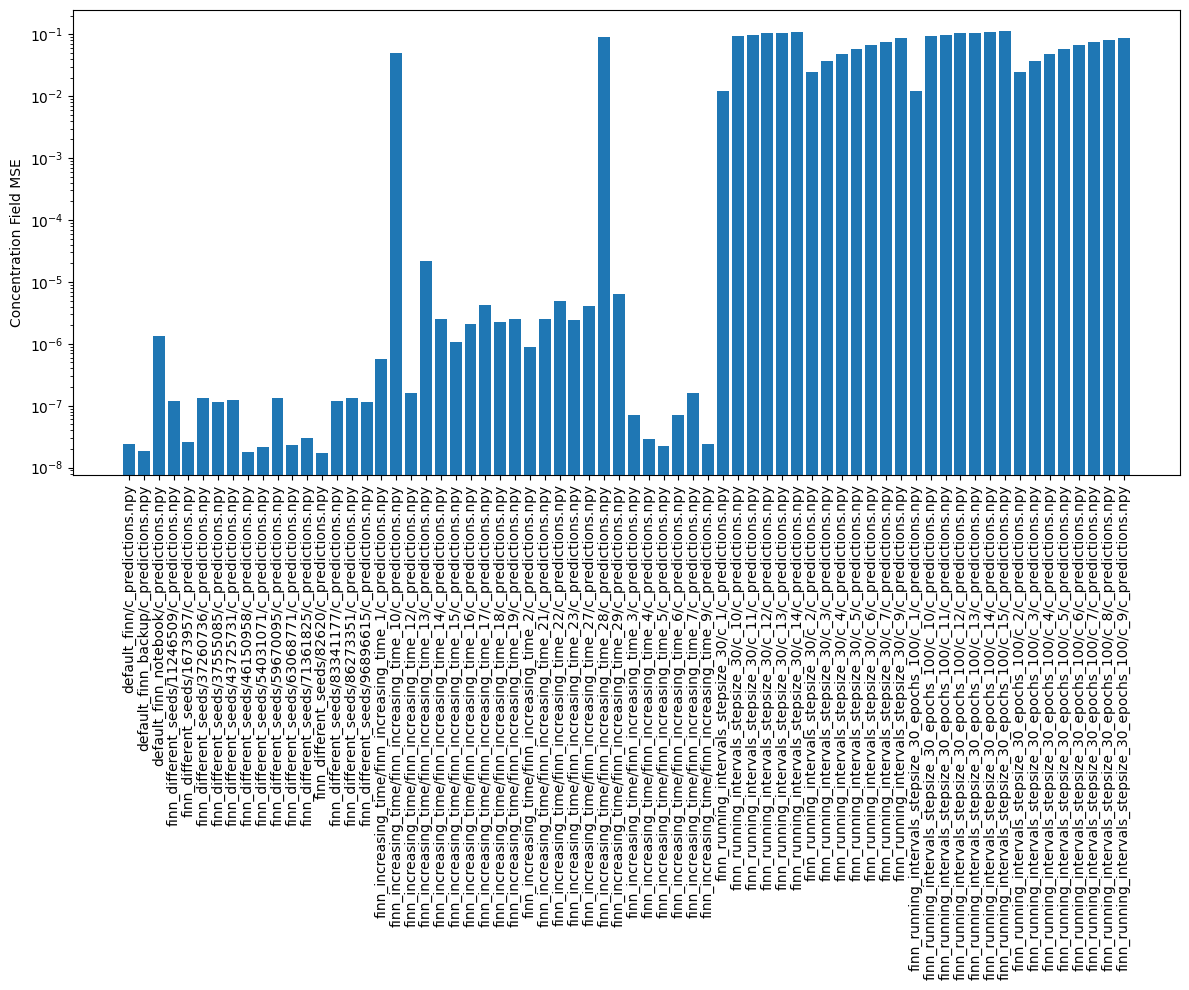

In [114]:
import matplotlib.pyplot as plt

df = {
    "experiment_dir": experiment_dirs,
    "label": [str(p.relative_to(data_out_dir)) for p in experiment_dirs],
    "c_error": np.array([np.mean((c_true[:np.load(p).shape[0]] - np.load(p))**2) for p in experiment_dirs]),
}
categories = np.array(df["label"])
values = df["c_error"]

# sort_indices = np.argsort(values, axis=0)
sort_indices = np.argsort(categories, axis=0)
sorted_categories = categories[sort_indices]
sorted_values = values[sort_indices]


plt.figure(figsize=(12, 10))
plt.bar(sorted_categories, sorted_values)
plt.xticks(rotation=90)
plt.ylabel('Concentration Field MSE')

plt.yscale("log")
plt.tight_layout()
plt.show()

### Group dirs by error and show the R curves

In [109]:
df["ret_file_path"] = []
for experiment_dir in df["experiment_dir"]:
    ret_file_paths = list(experiment_dir.rglob("retPred_*.npy"))
    if not ret_file_paths:
        print(f"No files found for {experiment_dir}")
    ret_file_paths = sorted(ret_file_paths, key=lambda x: int(x.stem.split("_")[-1]))
    ret_file_path = ret_file_paths[-1]
    df["ret_file_path"].append(ret_file_path)
df = pd.DataFrame(df)
df

No files found for ../data_out/default_finn_notebook/c_predictions.npy


IndexError: list index out of range